### __Step 1: Reading and Understanding the Data__


In [243]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler

#### __Loading Data & Exploration__

In [244]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

#### __Check the head of the dataset__

In [245]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### __Data Exploration__


In [246]:
bike.shape

(730, 16)

#### __Checking the descriptive information__

In [247]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [248]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### __Data Quality Check__

#### __Checking for null values__

#### __Verifying Missing Values Column Wise__

In [249]:
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### __Verifying Missing Values Row Wise__

In [250]:
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
14     0.0
13     0.0
12     0.0
11     0.0
10     0.0
Length: 730, dtype: float64

#### __Duplicate Check__

In [251]:
bike_dup = bike.copy()

##### __Checking for duplicates and dropping the entire duplicate row if any__ #####


In [252]:
bike_dup.drop_duplicates(subset=None, inplace=True)

In [253]:
bike_dup.shape

(730, 16)

#### __Summery of All key Findings__

Summery of key findings

- Size of data set is 730 x 16, 730 Rows and 16 Columns 
- Except one column i.e. dteday, others are either float or integer type, this date type
- Few fields are categorical in nature, but in Dataset these are present in form of integer/float 
- column 'yr' with two values 0 and 1 indicating the years 2018 and 2019
- Colums 'weathersit' and 'season' have values as 1, 2, 3, 4 which are in fact are Categorical 
- There are nissing / Null values neither in columns nor in rows
_ There are no Duplicate Values in provided Dataset

#### __Data Cleaning__
##### __Checking value_counts() for entire dataframe__
##### __This step shall identify any Unknow/Junk values present in the dataframe__

In [254]:
#Create a copy of the  dataframe, without the 'instant' column which doesnt have any relevance.
bike_dummy=bike.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
31-12-2019    1
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
             ..
15-01-2018    1
14-01-2018    1
13-01-2018    1
12-01-2018    1
11-01-2018    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

##### __Dataset characteristics__	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### __Removing redundant & unwanted columns__
##### _Based on the analysis of data set, following columns can be removed from data frame:__
- instant : Its only an index value
- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
- We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [255]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [256]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [257]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [258]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [259]:
# Encoding/mapping the season column

bike_new.season = bike_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the month column

bike_new.mnth = bike_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column

bike_new.weekday = bike_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Encoding/mapping the weathersit column

bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
# check the head of the dataset

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [260]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## __Step 2: Visualising the Data__

### Exploratory Data Analysis

##### __Data Visualisation of various varibale against target variable__
##### __Target Variable is cnt__


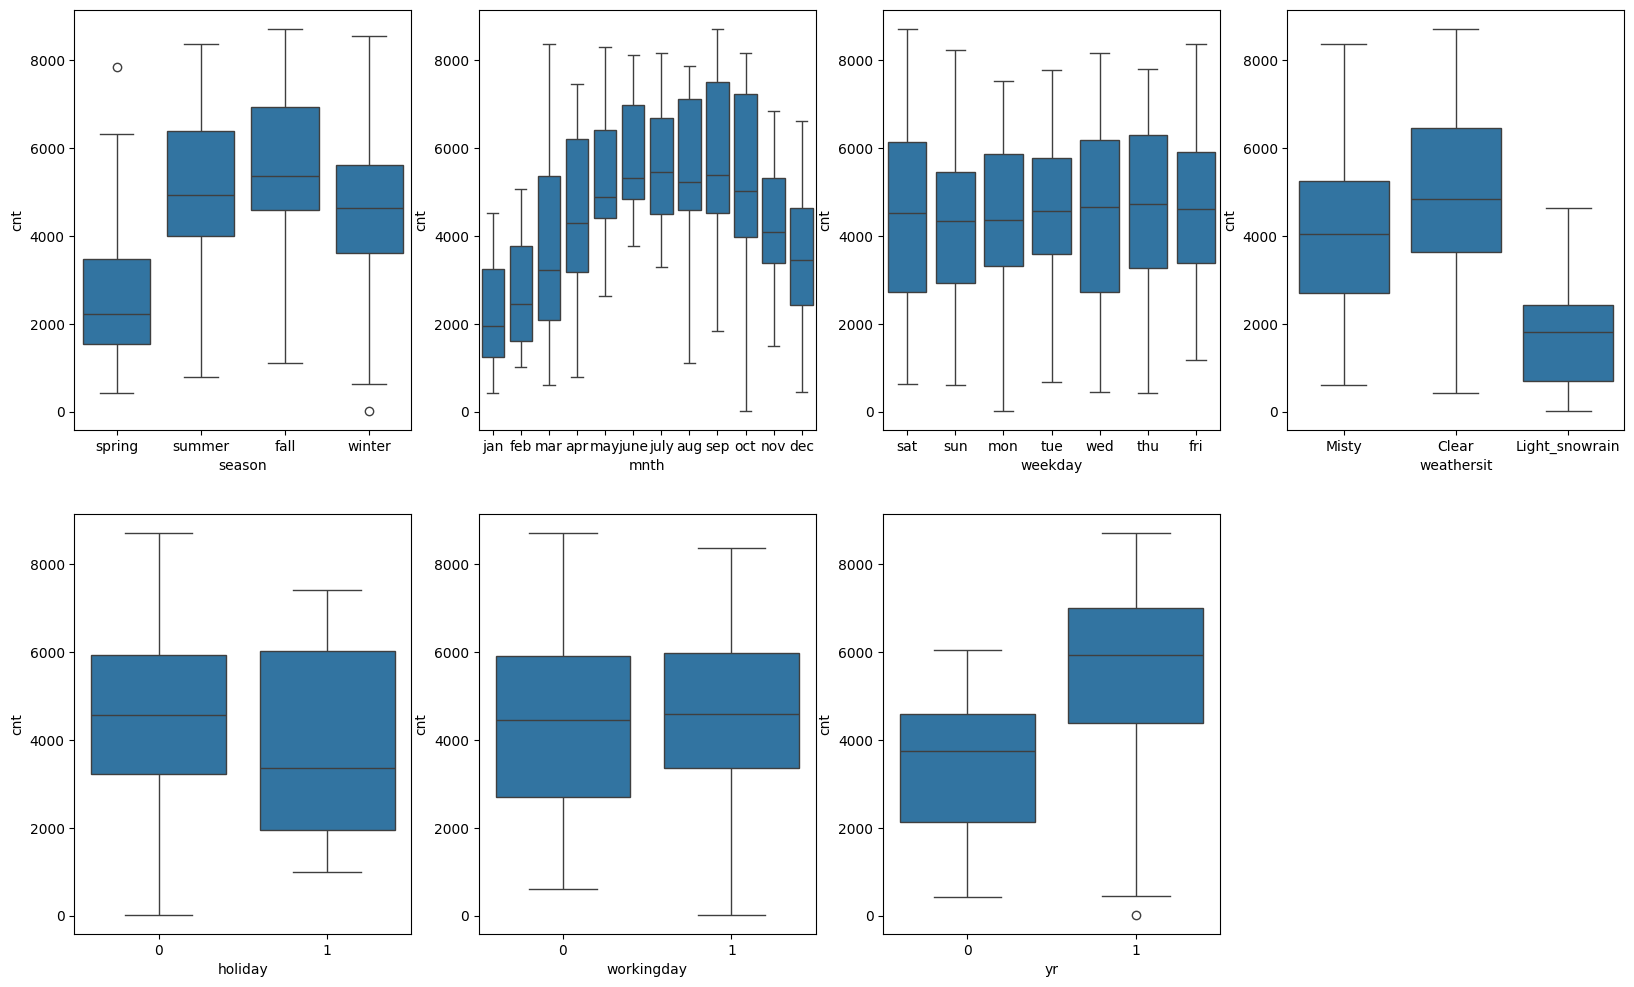

In [261]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.show()

In [262]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_new)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_new, hue='yr',palette='Set1')
    legend_colors = ['red', 'blue']
    legend_labels = ['2018', '2019']
    # Create custom handles for the legend
    handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
    # Add the legend to the plot
    plt.legend(handles=handles, labels=legend_labels)
    plt.show()

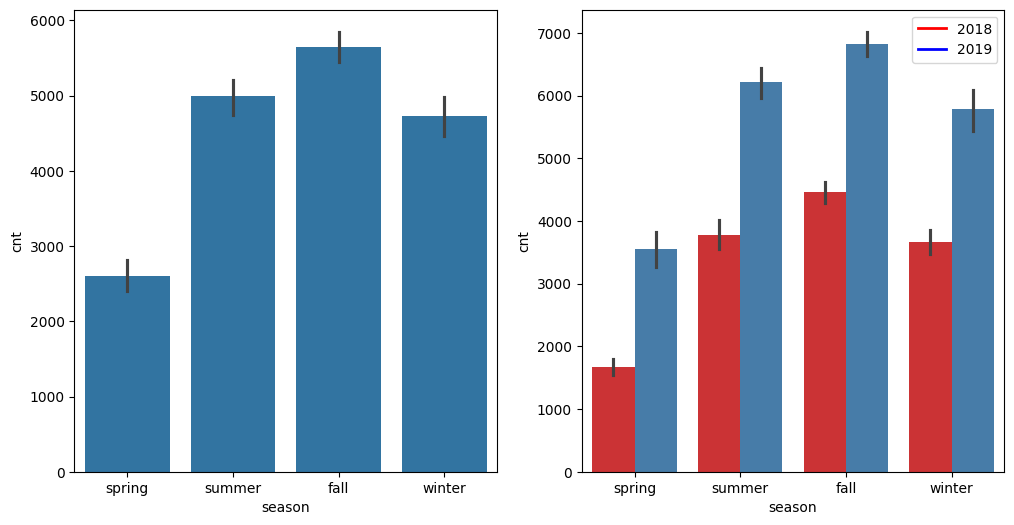

In [263]:
plot_cat_columns('season')

###### __Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.__

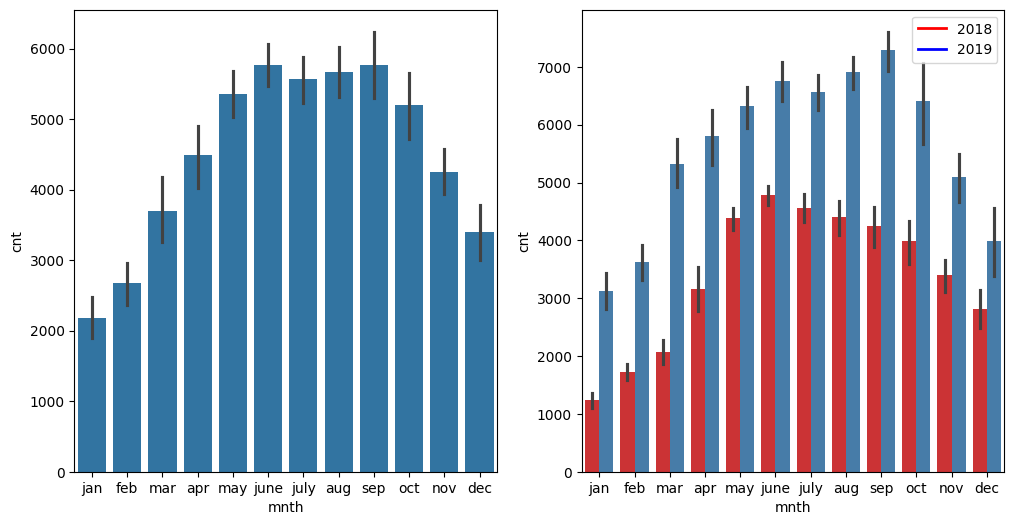

In [264]:
# plotting visualization for month column

plot_cat_columns('mnth')

###### __Majoity of the bookings carried out during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.__

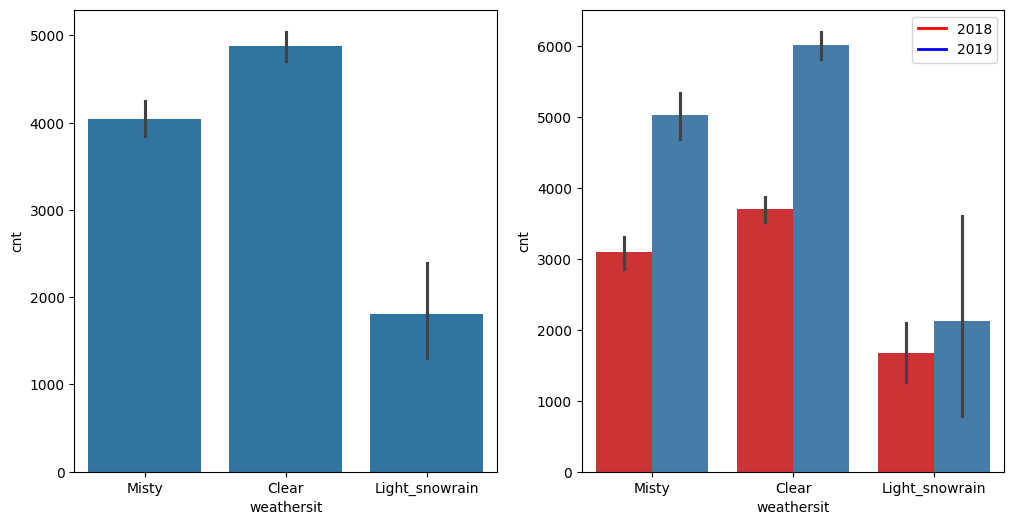

In [265]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

###### __Clear weather attracted more booking which seems obvious. And in comparison to 2018, booking increased for each weather situation in 2019.__

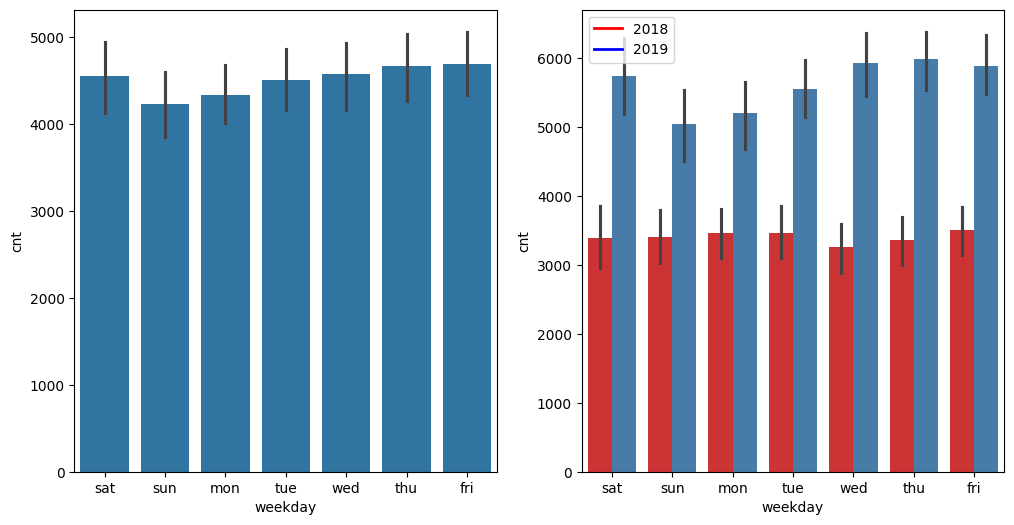

In [266]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

###### __Thu, Fir, Sat have more number of bookings as compared to the start of the week.__

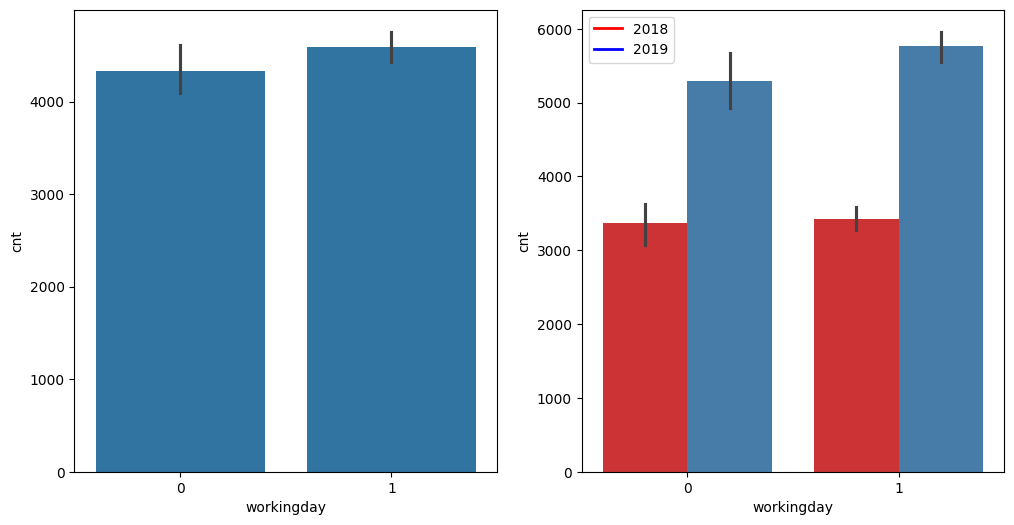

In [267]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

###### __Booking seemed to be almost equal either on working day or non-working day. But, the quantity of booking increased from 2018 to 2019.__

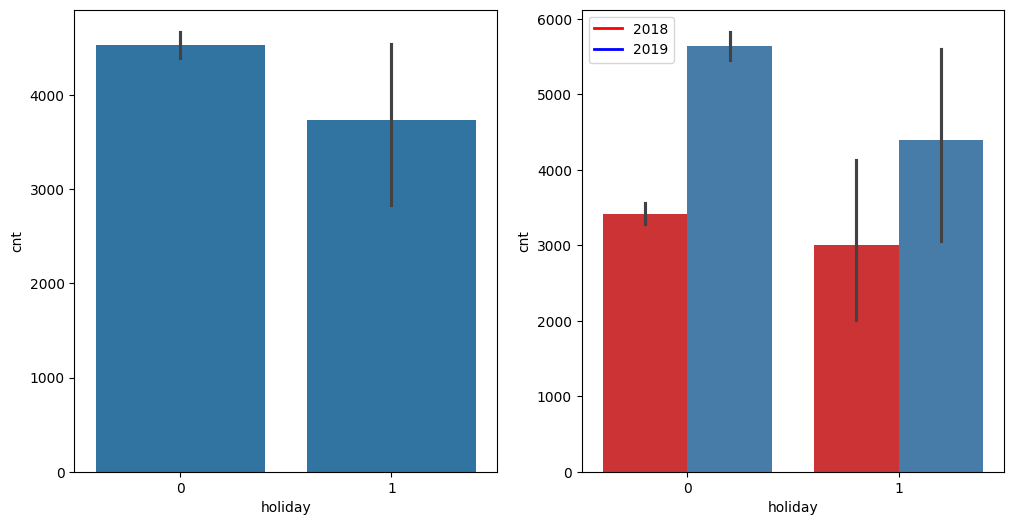

In [268]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

###### __When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.__

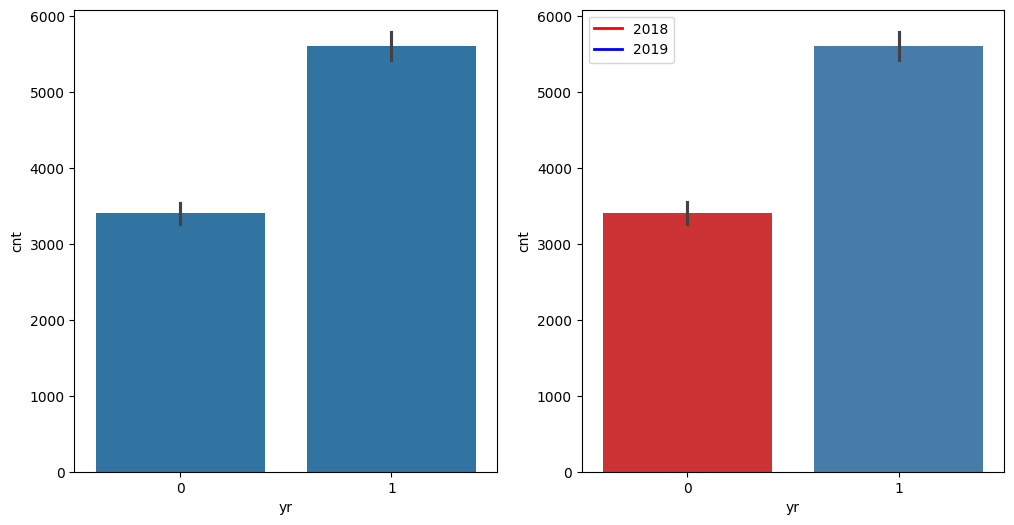

In [269]:
# plotting visualization for year column

plot_cat_columns('yr')

###### __2019 attracted more number of booking compared to 2018, which shows good progress in terms of business.__

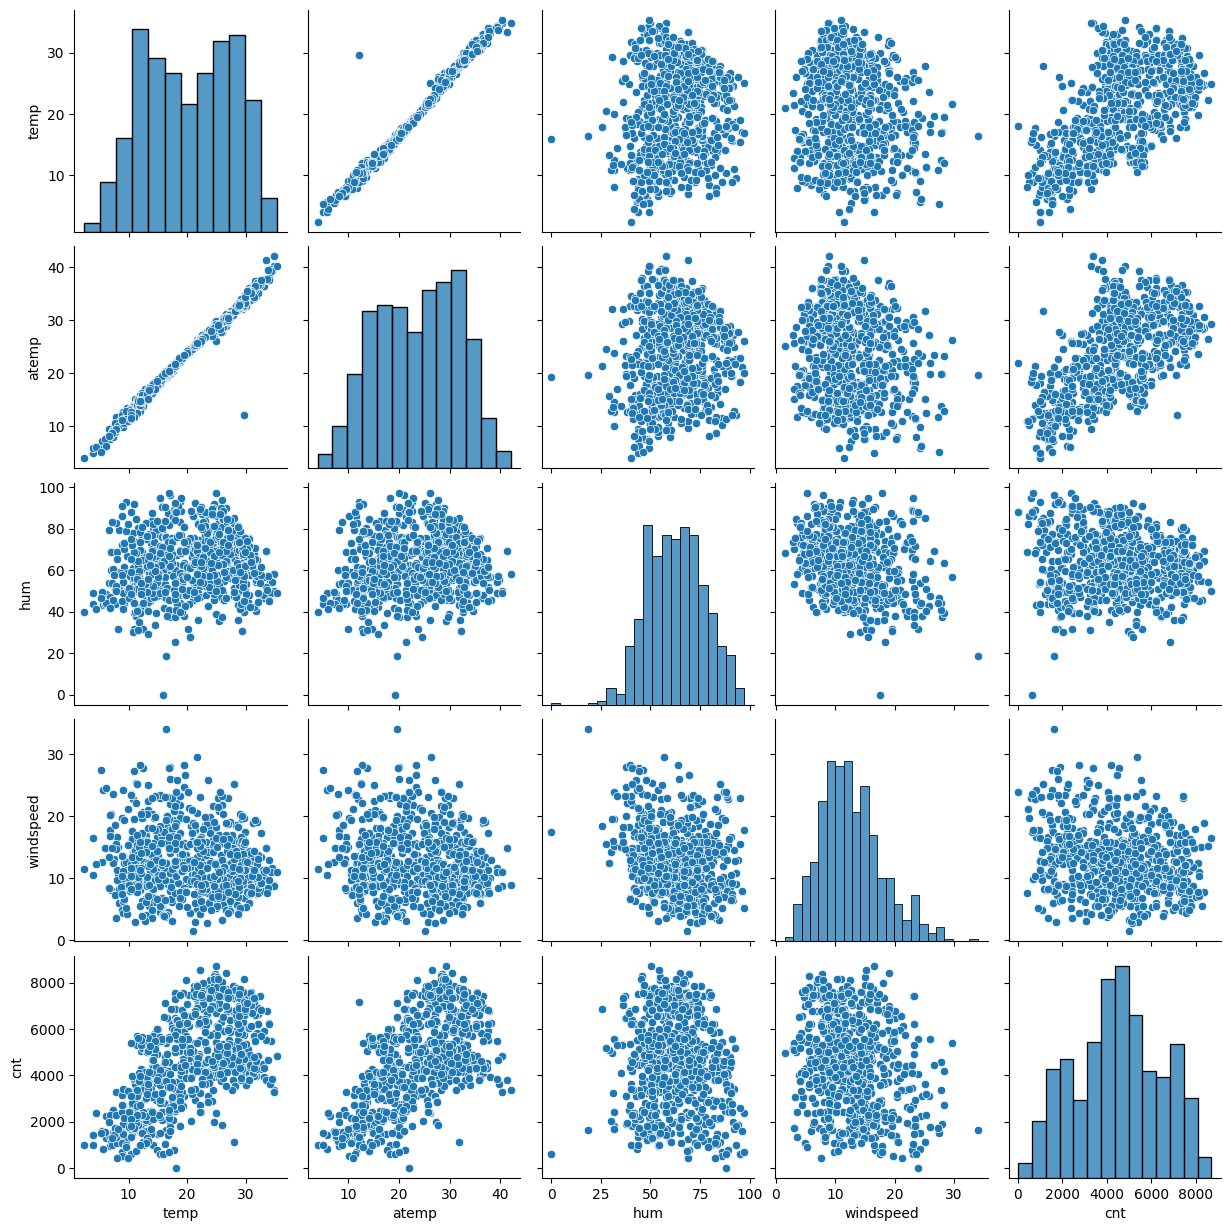

In [270]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bike_new,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

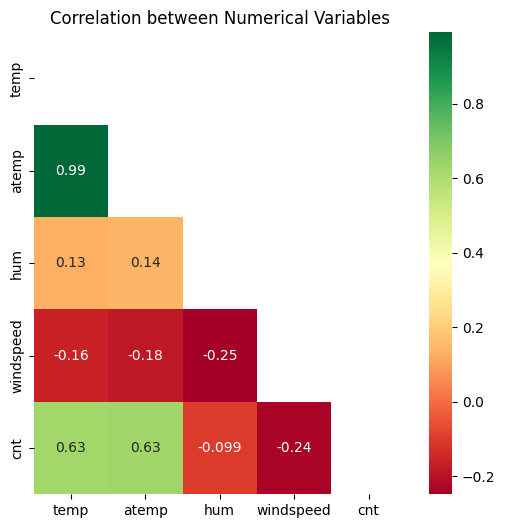

In [271]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_new[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_new[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

###### __Its quite evident from above plot that there is linear relationship between variable temp and atemp, hence we ca not use both parameters in the model due to multicolinearity. We have to check the values of VIF and p-value w.r.t other variables__

In [272]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## __Step 3: Data Preparation__

##### __As we do see in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case, so converting such feature values into categorical string values before proceeding with model building.__

In [273]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')


In [274]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### __Creation of Dummy Variable__



##### __In Linear Regression SLR or MLR, dummy variables are created to represent categorical data in a numerical format so that the regression model can process it.__

- Why Dummy Variables Are Needed:
    - Numerical Processing: Regression algorithms work with numerical data, and categorical variables (e.g., "Male" or "Female") must be converted into numerical equivalents.
    - Representation of Categories: Dummy variables allow us to represent different categories without imposing a numerical order, ensuring that the model doesn't assume any ordinal relationship.
    - Interpretation: Dummy variables help the model assess the impact of each category on the dependent variable.

##### __Objective of code__
- Create Dummy variable for season, mnth, weekday and weathersit category variables
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created.


In [275]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    bool   
 9   season_summer              730 non-null    bool   
 10  season_winter              730 non-null    bool   
 11  mnth_aug                   730 non-null    bool   
 12  mnth_dec                   730 non-null    bool   
 13  mnth_feb                   730 non-null    bool   

In [276]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [277]:
bike_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    bool   
 9   season_summer              730 non-null    bool   
 10  season_winter              730 non-null    bool   
 11  mnth_aug                   730 non-null    bool   
 12  mnth_dec                   730 non-null    bool   
 13  mnth_feb                   730 non-null    bool   

In [278]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [279]:
for col in ['season_spring', 'season_summer','season_winter','mnth_aug','mnth_dec','mnth_feb','mnth_jan','mnth_july','mnth_june','mnth_mar','mnth_may','mnth_nov','mnth_oct','mnth_sep','weekday_mon','weekday_sat','weekday_sun','weekday_tue','weekday_thu','weekday_wed','weathersit_Light_snowrain','weathersit_Misty'] :    bike_new[col] = bike_new[col].astype('uint8')

In [280]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

In [281]:
# check the shape of new dataframe

bike_new.shape

(730, 30)

In [282]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## __Step 4: Splitting Data into Training and Testing Sets__

#### __Train Test Split__

##### __Spilliting the Train data and Test data in 70:30 ratio__


In [283]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [284]:
# Shape of Training datatset
df_train.shape

(510, 30)

In [285]:
# Shape of Testing datatset
df_test.shape

(219, 30)

#### __Scaling the variables__
##### __Why we need scaling__
- Ease of interpretation
- Faster convergence for gradient descent methods
##### __How to achieve Scaling__
- Standardisation
- MinMax Scaling
###### __Standardisation brings all of the data into a standard normal distribution with mean zero and standard deviation one. MinMax scaling, on the other hand, brings all of the data in the range of 0 and 1.__


In [286]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [287]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [288]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [289]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


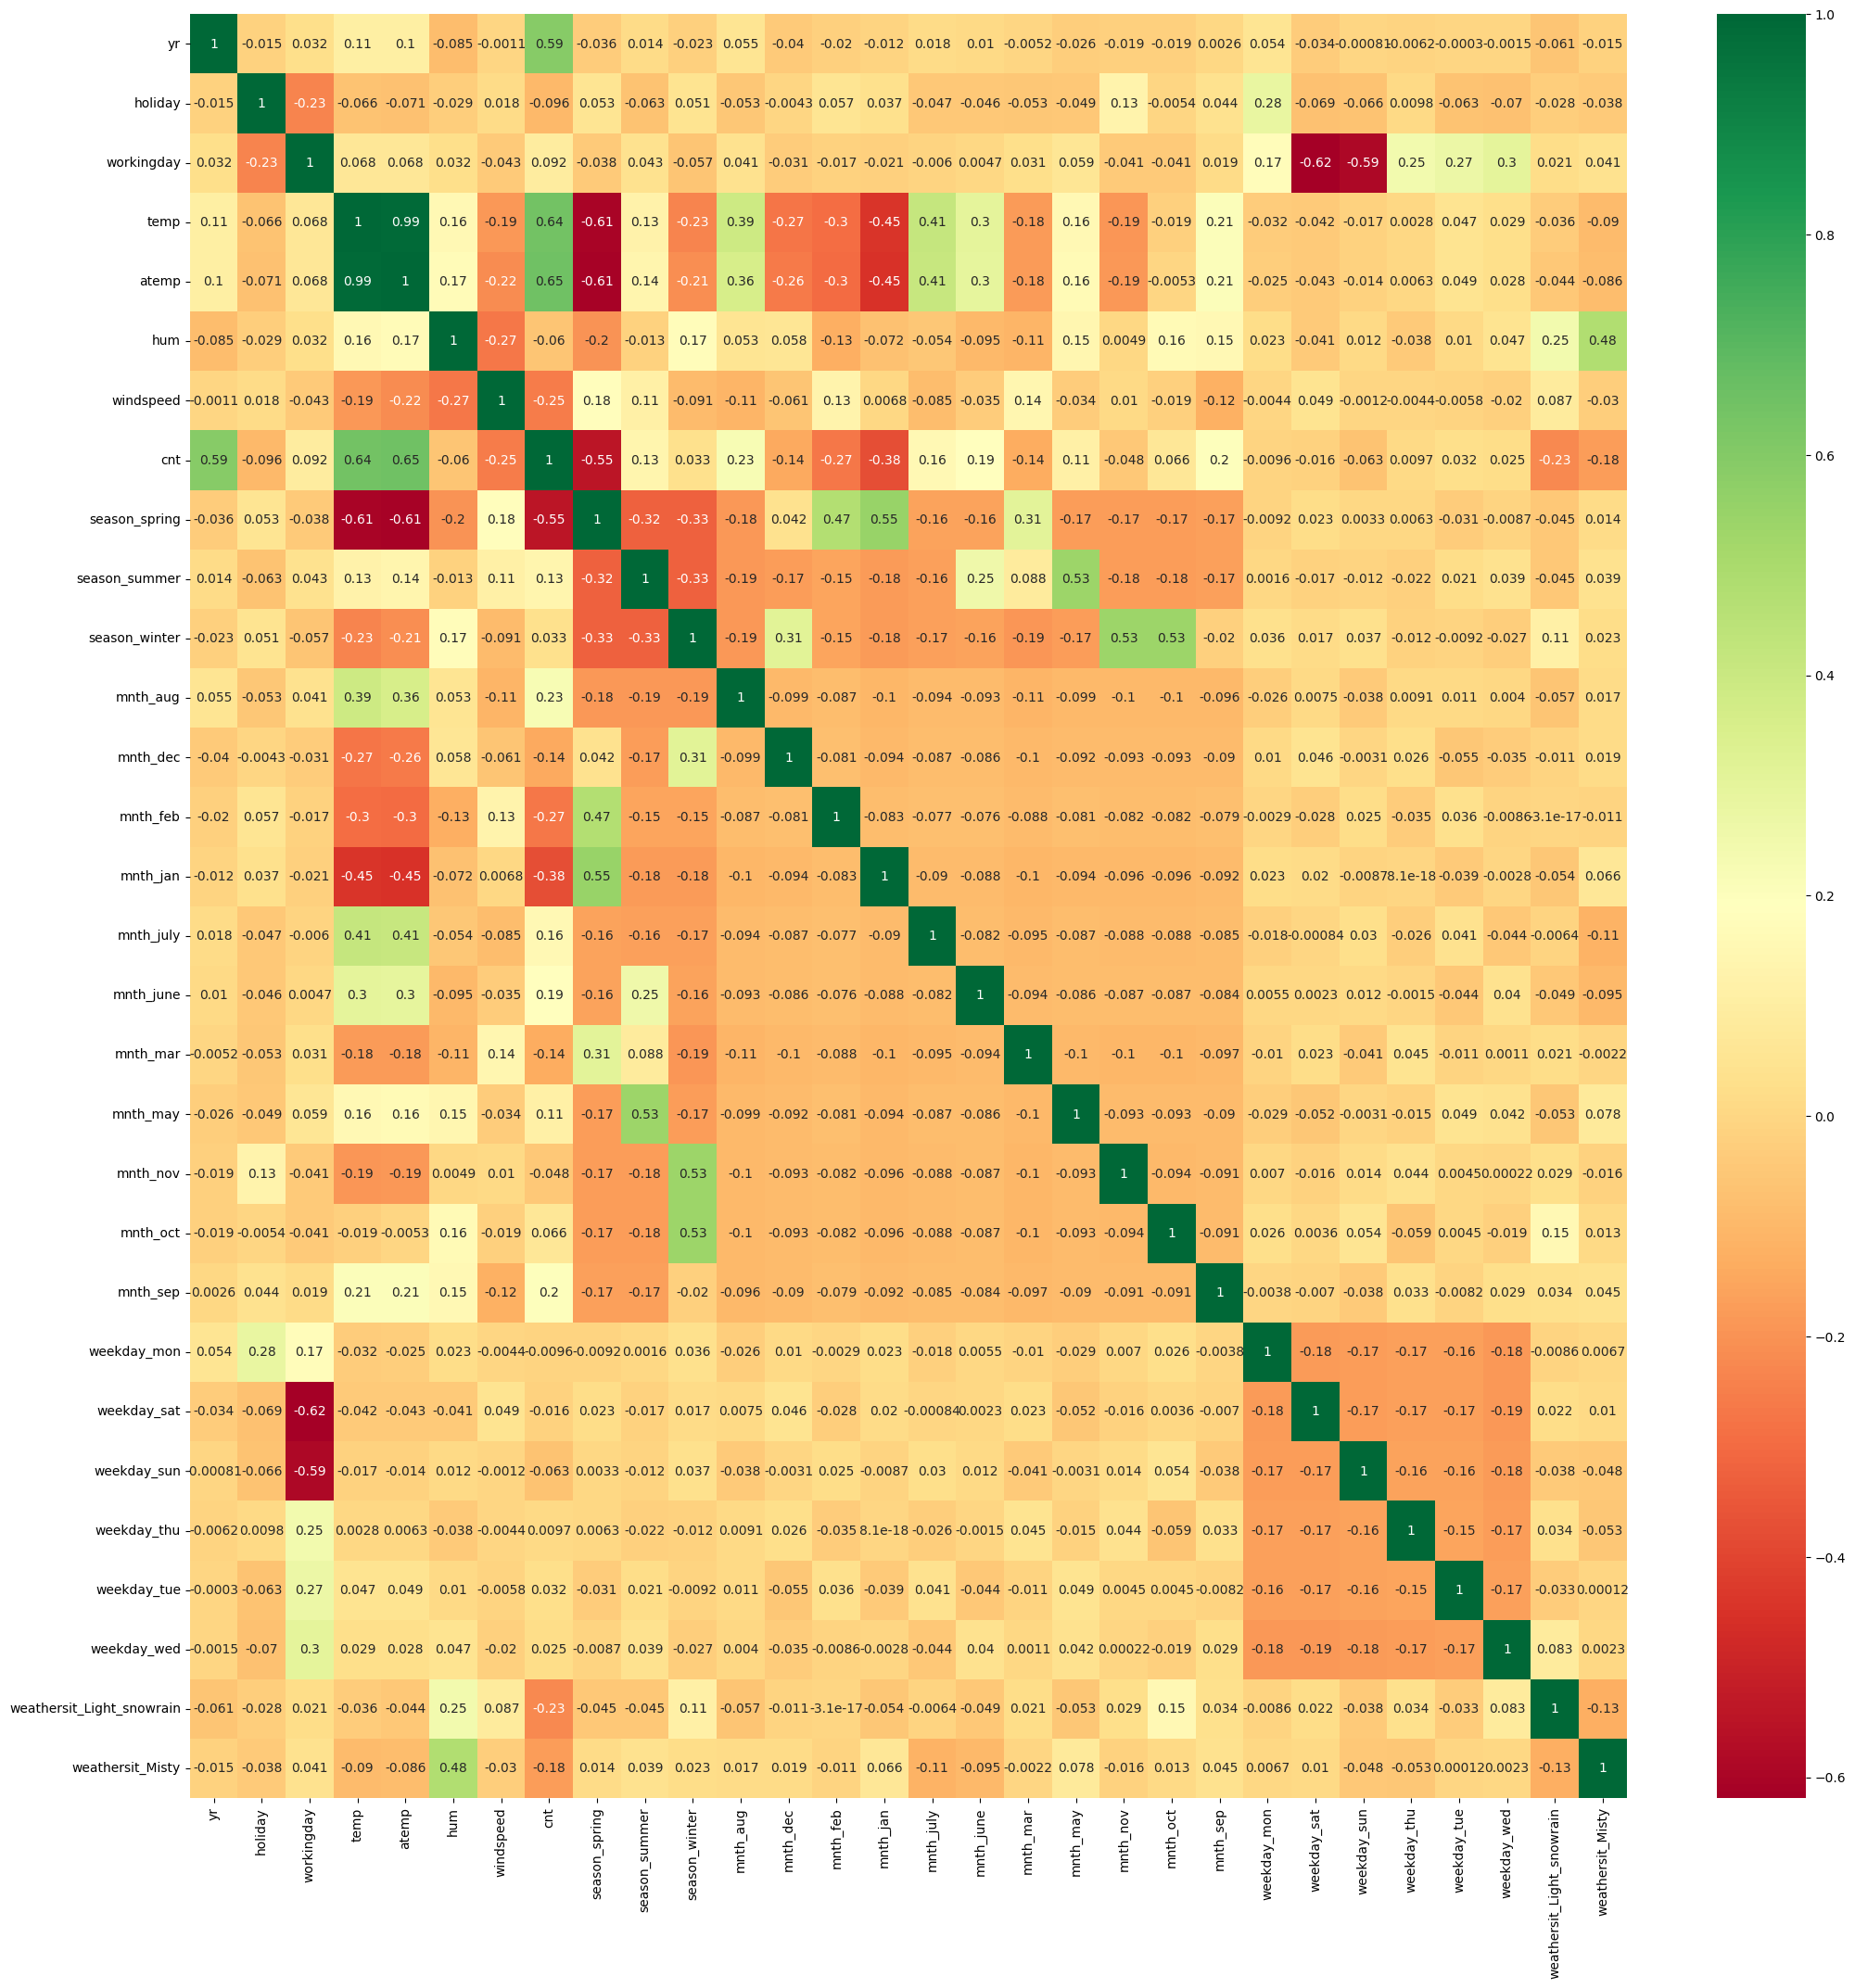

In [290]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note: here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### __Finding__
- cnt have correlation with variables year, temp and atemp. 
- Misty and humidity show correlation. 
- Spring season with Jan and Feb month, 
- Summer season with may month 
- Winter season with oct and nov month 

###### __The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable cnt__
###### __We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.__

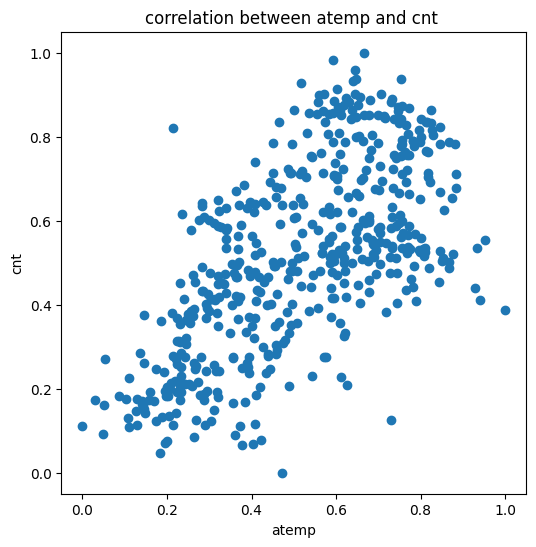

In [291]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.xlabel("atemp")  # Set the label for the x-axis
plt.ylabel("cnt")  # Set the label for the y-axis
plt.title("correlation between atemp and cnt ")
plt.show()

###### __Visualization confirms the positive correlation between atemp and cnt.__

In [292]:
# Building the Linear Model
# target vraible cnt hence we need to popup it out
y_train = df_train.pop('cnt')
X_train = df_train

##### __RFE : Recursive feature elimination: Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklean)__

In [293]:
# Recursive feature elimination 
# Initialize a linear regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Initialize RFE 
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on the data
rfe = rfe.fit(X_train, y_train)

In [294]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(5)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.False_, np.int64(7)),
 ('mnth_dec', np.False_, np.int64(3)),
 ('mnth_feb', np.False_, np.int64(4)),
 ('mnth_jan', np.True_, np.int64(1)),
 ('mnth_july', np.True_, np.int64(1)),
 ('mnth_june', np.False_, np.int64(14)),
 ('mnth_mar', np.False_, np.int64(15)),
 ('mnth_may', np.False_, np.int64(6)),
 ('mnth_nov', np.False_, np.int64(2)),
 ('mnth_oct', np.False_, np.int64(11)),
 ('mnth_sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(9)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.False_, np.int64(8)),
 ('weekday_thu', np.False_, np.int64(12)),
 ('weekday_tue', np.F

In [295]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_july', 'mnth_sep', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [296]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## __Step 5: Building Linear Model using statsmodels__

### __Iteration - 1__

##### __As we know lots of predictor variable are related and this situation is called Multicollinearity. Thus, its a big issue when trying to interpret the model. It is essential to detect and deal with the multicollinearity present in the model. How to deal with multicollinearity__
##### __Two basic ways of dealing with multicollinearity__
- Looking at pairwise correlations, Looking at the correlation between different pairs of independent variables
- Checking the Variance Inflation Factor (VIF)


#### __Checking Variance Inflation Factor (VIF)__


In [297]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [298]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [299]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_sat,1.98


###### __hum shows high VIF value__


In [300]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [301]:
# Check the parameters obtained
lr1.params

const                        0.251042
yr                           0.230502
holiday                     -0.058529
workingday                   0.043521
temp                         0.509836
hum                         -0.154716
windspeed                   -0.185956
season_spring               -0.050806
season_summer                0.049660
season_winter                0.094426
mnth_jan                    -0.034326
mnth_july                   -0.053193
mnth_sep                     0.081186
weekday_sat                  0.053721
weathersit_Light_snowrain   -0.248777
weathersit_Misty            -0.057824
dtype: float64

In [302]:
# Print a summary of the linear regression model obtained after Iteration - 1
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          2.31e-191
Time:                        14:48:11   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### __Iteration - 2__

#### __In Iteration-2 we are going to drop variable 'hum' as it has high VIF__

In [303]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-2__

In [304]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_sat,1.97
8,mnth_jan,1.62
9,mnth_july,1.59


In [305]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [306]:
lr2.params

const                        0.173663
yr                           0.234361
holiday                     -0.056199
workingday                   0.046502
temp                         0.472823
windspeed                   -0.156264
season_spring               -0.059704
season_summer                0.043352
season_winter                0.079699
mnth_jan                    -0.038947
mnth_july                   -0.048222
mnth_sep                     0.075318
weekday_sat                  0.058434
weathersit_Light_snowrain   -0.291727
weathersit_Misty            -0.082621
dtype: float64

In [307]:
# Print a summary of the linear regression model obtained after Iteration - 2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          7.33e-189
Time:                        14:48:11   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### __Iteration - 3__

#### __In Iteration-3 we are going to remove variable 'temp' as it has high VIF__

In [308]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-3__

In [309]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.27
6,season_winter,1.99
0,yr,1.91
10,weekday_sat,1.69
7,mnth_jan,1.60
12,weathersit_Misty,1.56
8,mnth_july,1.30


In [310]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)
# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [311]:
lr3.params

const                        0.544807
yr                           0.247764
holiday                     -0.057113
workingday                   0.048020
windspeed                   -0.187831
season_spring               -0.260282
season_summer               -0.044001
season_winter               -0.074896
mnth_jan                    -0.102448
mnth_july                   -0.009855
mnth_sep                     0.070843
weekday_sat                  0.056390
weathersit_Light_snowrain   -0.304452
weathersit_Misty            -0.089625
dtype: float64

In [312]:
# Print a summary of the linear regression model obtained after Iteration - 3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          4.04e-154
Time:                        14:48:11   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### __Iteration - 4__

#### __In Iteration-4 we are going to drop variable 'mnth_july' as it has very high p-value 0.645__

In [313]:
X_train_new = X_train_new.drop(["mnth_july"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-4__

In [314]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,season_spring,2.68
5,season_summer,2.00
0,yr,1.89
6,season_winter,1.78
9,weekday_sat,1.62
7,mnth_jan,1.60
11,weathersit_Misty,1.56
8,mnth_sep,1.20


In [315]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [316]:
lr4.params

const                        0.540946
yr                           0.247801
holiday                     -0.056683
workingday                   0.048271
windspeed                   -0.187743
season_spring               -0.256768
season_summer               -0.040510
season_winter               -0.071579
mnth_jan                    -0.102494
mnth_sep                     0.073590
weekday_sat                  0.056533
weathersit_Light_snowrain   -0.304579
weathersit_Misty            -0.089309
dtype: float64

In [317]:
# Print a summary of the linear regression model obtained after Iteration - 4
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          3.62e-155
Time:                        14:48:11   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### __Iteration - 5__

#### __In Iteration-5 we are going to drop variable 'holiday' as it has very high p-value 0.007__

In [318]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-5__

In [319]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_spring,2.65
4,season_summer,1.99
0,yr,1.88
5,season_winter,1.73
6,mnth_jan,1.60
8,weekday_sat,1.56
10,weathersit_Misty,1.56
7,mnth_sep,1.18


In [320]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [321]:
lr5.params

const                        0.533414
yr                           0.247992
workingday                   0.056660
windspeed                   -0.188736
season_spring               -0.258069
season_summer               -0.040579
season_winter               -0.072862
mnth_jan                    -0.103085
mnth_sep                     0.071353
weekday_sat                  0.065027
weathersit_Light_snowrain   -0.303393
weathersit_Misty            -0.088820
dtype: float64

In [322]:
# Print a summary of the linear regression model obtained after Iteration - 5
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          1.30e-155
Time:                        14:48:11   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### __Iteration Summery__


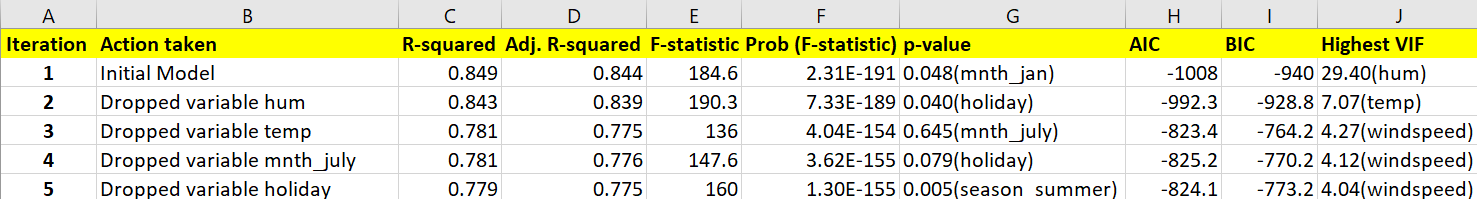

#### __Analysis, Insight and Conclusion__

##### __Based on the Iteration details, let’s evaluate which iteration is better for the Multiple Linear Regression (MLR) model by focusing on the following criteria__
- 1.	Adjusted R-squared: A higher value indicates a better fit of the model while penalizing for additional predictors.
- 2.	AIC/BIC: Lower values suggest a better model fit, balancing goodness-of-fit and model complexity.
- 3.	Highest VIF: A lower value reduces concerns about multicollinearity.
- 4.	p-value for F-statistic: Ensures the overall model is statistically significant.
##### __Iteration Analysis__
##### __Iteration 1__
- Adjusted R-squared: 0.844 (highest among all iterations).
- AIC/BIC: -1008 / -940 (lowest values).
- Highest VIF: 29.40 (hum), indicating high multicollinearity.
- Comment: While this model explains the most variance (highest Adjusted R-squared), the high VIF indicates multicollinearity concerns, which may affect coefficient reliability.
##### __Iteration 2__
- Adjusted R-squared: 0.839 (slightly reduced from Iteration 1).
- AIC/BIC: -992.3 / -928.8 (increased slightly compared to Iteration 1).
- Highest VIF: 7.07 (temp), significantly improved compared to Iteration 1.
- Comment: This iteration resolves the multicollinearity issue with hum, making the model more stable, with only a slight decrease in fit.
##### __Iteration 3__
- Adjusted R-squared: 0.775 (sharp drop compared to Iterations 1 and 2).
- AIC/BIC: -823.4 / -764.2 (significantly worse than previous iterations).
- Highest VIF: 4.27 (windspeed), still within acceptable limits.
- Comment: Dropping temp significantly reduces model fit and makes this iteration less desirable.
##### __Iteration 4__
- Adjusted R-squared: 0.776 (similar to Iteration 3 but slightly better).
- AIC/BIC: -825.2 / -770.2 (slightly improved from Iteration 3 but still worse than Iterations 1 and 2).
- Highest VIF: 4.12 (windspeed), acceptable.
- Comment: While the model is statistically valid, it does not provide substantial improvements over Iteration 3.
##### __Iteration 5__
- Adjusted R-squared: 0.775 (similar to Iterations 3 and 4).
- AIC/BIC: -824.1 / -773.2 (similar to Iterations 3 and 4 but worse than Iterations 1 and 2).
- Highest VIF: 4.04 (windspeed), acceptable.
- Comment: Dropping holiday does not provide meaningful improvements.
##### __Recommendation__
##### __Based on the evaluation:__
- Iteration 1 provides the best overall model fit (highest Adjusted R-squared and lowest AIC/BIC). However, it suffers from high multicollinearity due to the VIF for hum.
- Iteration 2 balances model fit and stability, significantly reducing VIF without a substantial drop in Adjusted R-squared. This iteration has acceptable multicollinearity and good AIC/BIC.
##### __Conclusion : Best Iteration: Iteration 2__
Iteration 2 is preferable for an MLR model as it provides a good balance between performance (Adjusted R-squared, AIC/BIC) and stability (lower VIF).


In [323]:
# Checking the parameters and their coefficient values
lr2.params

const                        0.173663
yr                           0.234361
holiday                     -0.056199
workingday                   0.046502
temp                         0.472823
windspeed                   -0.156264
season_spring               -0.059704
season_summer                0.043352
season_winter                0.079699
mnth_jan                    -0.038947
mnth_july                   -0.048222
mnth_sep                     0.075318
weekday_sat                  0.058434
weathersit_Light_snowrain   -0.291727
weathersit_Misty            -0.082621
dtype: float64

#### __Final Model Interpretation__
##### __Hypothesis Testing:__
- Hypothesis testing states that:
    - H0:B1=B2=...=Bn=0
    - H1: at least one Bi!=0
##### __From the lr2 model summary, it is evident that all coefficients are not equal to zero which means we can REJECT the NULL HYPOTHESIS__

#### __Interpretation of Coefficients:__
###### **const**: The Constant value of ‘0.173663 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.173663 units.

###### **yr**: A coefficient value of ‘0.234361’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.234361 units.

###### **holiday**: A coefficient value of ‘-0.056199’ indicated that, w.r.t Holiday, a unit increase in Holiday variable, decreases the bike hire numbers by -0.056199 units.

###### **workingday**: A coefficient value of ‘0.046502 indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.046502 units.

###### **temp**: A coefficient value of ‘0.472823’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.472823 units.

###### **windspeed**: A coefficient value of ‘-0.156264’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.156264 units.

###### **season_spring**: A coefficient value of ‘-0.059704’ indicated that w.r.t season_spring, a unit increase in season_spring variable decreases the bike hire numbers by 0.059704 units.

###### **season_summer**: A coefficient value of ‘0.043352’ indicated that w.r.t season_summer, a unit increase in season_2 variable increases the bike hire numbers by 0.043352 units.

###### **season_winter**: A coefficient value of ‘0.079699’ indicated that w.r.t season_winter, a unit increase in season_2 variable increases the bike hire numbers by 0.079699 units.

###### **mnth_jan**: A coefficient value of ‘-0.038947’ indicated that w.r.t mnth_jan, a unit increase in mnth_jan variable decreases the bike hire numbers by 0.038947 units.

###### **mnth_july**: A coefficient value of ‘-0.048222’ indicated that w.r.t mnth_july, a unit increase in mnth_jan variable decreases the bike hire numbers by 0.048222 units.

###### **mnth_sep**: A coefficient value of ‘0.075318’ indicated that w.r.t mnth_sep, a unit increase in mnth_sep variable increases the bike hire numbers by 0.075318 units.

###### **weekday_sat**: A coefficient value of ‘0.058434’ indicated that w.r.t weekday_sat, a unit increase in weekday_sat variable increases the bike hire numbers by 0.058434 units.

###### **weathersit_Light_snowrain**: A coefficient value of ‘-0.291727’ indicated that, w.r.t weathersit_Light_snowrain, a unit increase in weathersit_Light_snowrain variable, decreases the bike hire numbers by 0.291727 units.

###### **weathersit_Misty**: A coefficient value of ‘-0.082621’ indicated that, w.r.t weathersit_Misty, a unit increase in weathersit_Misty variable, decreases the bike hire numbers by 0.082621 units.

## __Step 6: Residual Analysis of the train data and validation__

In [324]:
X_train_new

,yr,workingday,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty
653,1,1,0.300794,0,0,1,0,0,0,0,0
576,1,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,1,0,1
728,1,0,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.355596,0,1,0,0,0,0,0,1
578,1,1,0.187140,0,0,0,0,0,0,0,0
53,0,1,0.111379,1,0,0,0,0,0,0,0
350,0,0,0.431816,0,0,1,0,0,1,0,1


In [325]:
y_train_pred = lr2.predict(X_train_lm2)

#### __Normality of error terms__

Text(0.5, 0, 'Errors')

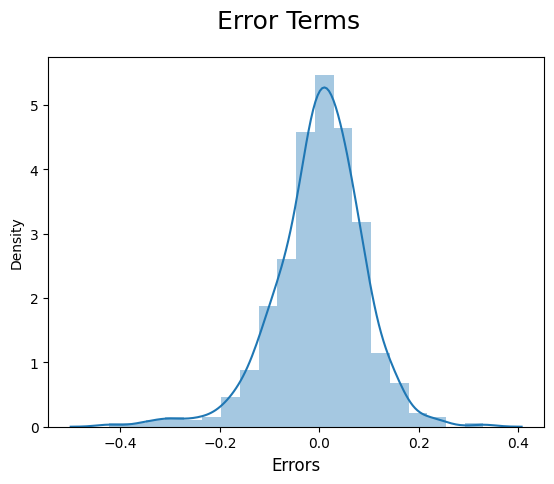

In [326]:
# Plot the histogram of the error terms
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

###### __**Insights**: From the above histogram, we could see that the Residuals are normally distributed, which proves that assumption for Linear Regression is valid.__

### __Homoscedasticity__
##### __Assumption of homoscedasticity refers to the condition where the variance of the error terms is constant across all levels of the independent variable. When this assumption is violated, the error terms are said to be heteroscedastic, which can have several implications for the model's performance and inference.__
##### __Detecting heteroscedasticity is crucial, doing it through residual plot__

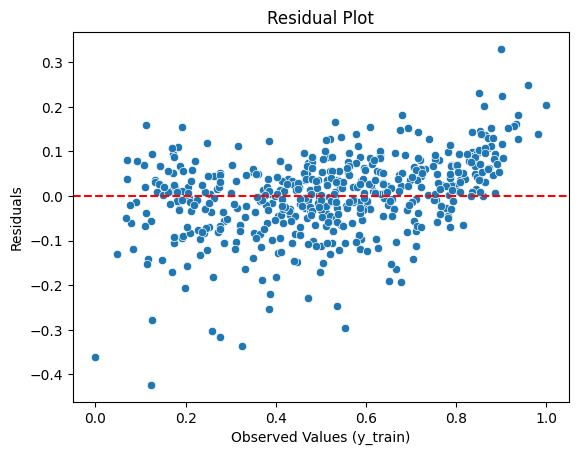

In [327]:
y_train_pred = lr2.predict(X_train_lm2)  # Predict values
residual = y_train - y_train_pred       # Calculate residuals

# Scatter plot of residuals
sns.scatterplot(x=y_train, y=residual)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Observed Values (y_train)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##### __No visible pattern observed from above plot for residuals.__

##### __Independence of residuals__
##### __Durbin-Watson value of final model lr2 is 2.066, which signifies there is no autocorrelation.__
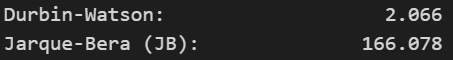

### __Verification of Multicollinearity between all predicted variables__

In [328]:
X_train_lm2 = X_train_lm2.drop(["const"], axis = 1)
calculateVIF(X_train_lm2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_sat,1.97
8,mnth_jan,1.62
9,mnth_july,1.59


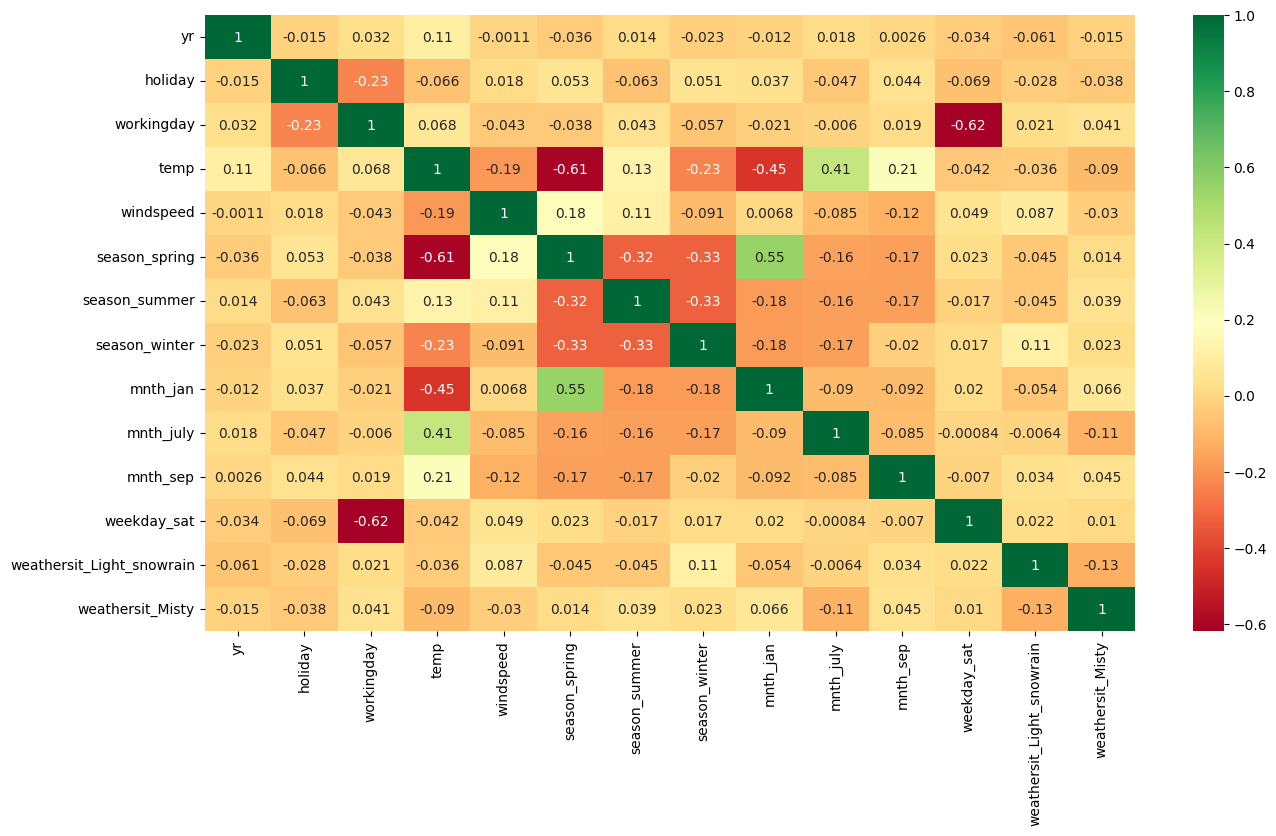

In [329]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm2.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### __Verification of Linearity__

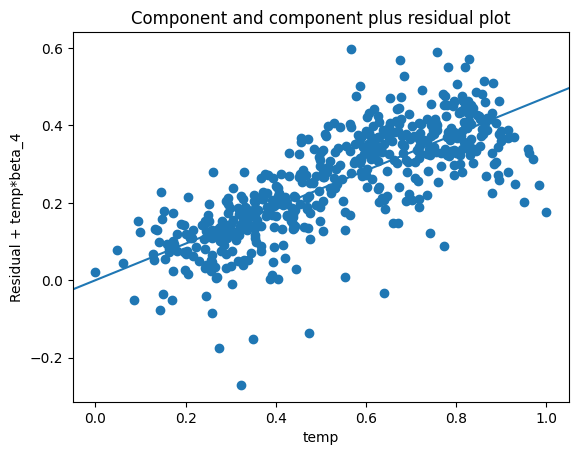

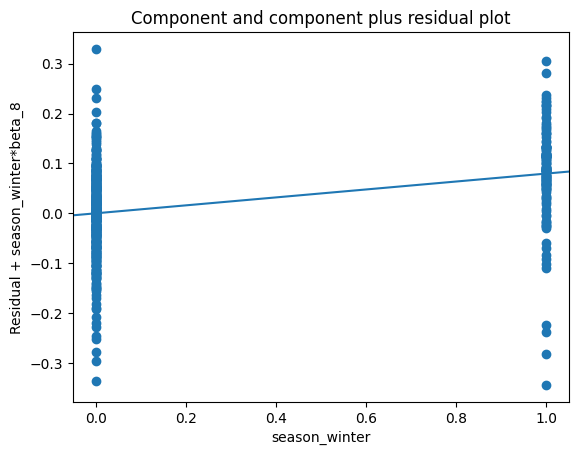

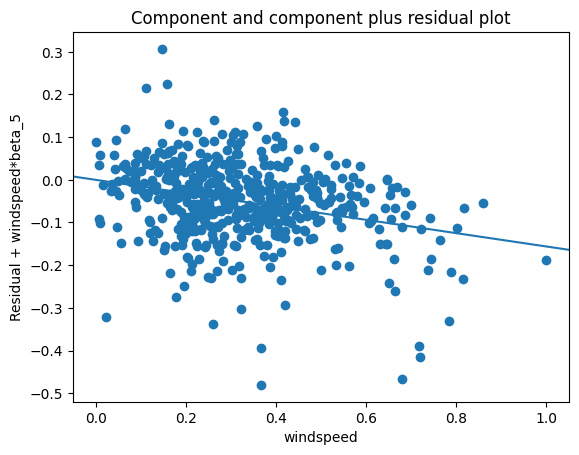

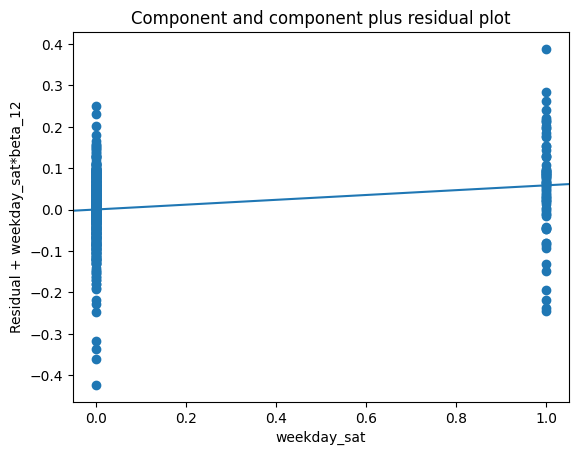

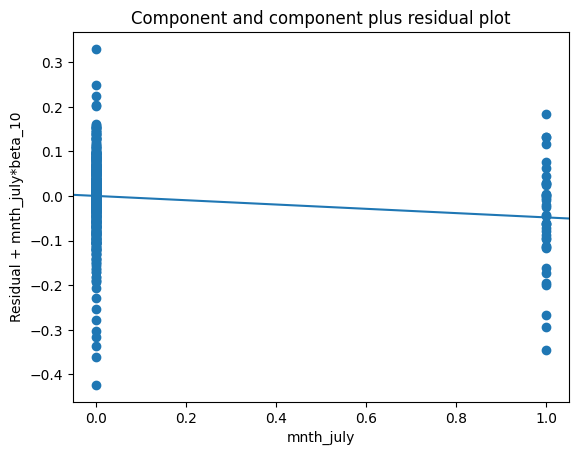

In [330]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr2, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr2, 'season_winter')
plt.show()

sm.graphics.plot_ccpr(lr2, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr2, 'weekday_sat')
plt.show()

sm.graphics.plot_ccpr(lr2, 'mnth_july')
plt.show()

## __Step 7: Predictions Using the choosen Final Model__


#### __Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr2)__

#### __Applying the scaling on the test sets__

#### Apply scaler() to all numeric variables in test dataset. 
#### Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. In other words, we want to prevent the information leak from train to test dataset

In [331]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [332]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   hum                        219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   season_spring              219 non-null    uint8  
 8   season_summer              219 non-null    uint8  
 9   season_winter              219 non-null    uint8  
 10  mnth_aug                   219 non-null    uint8  
 11  mnth_dec                   219 non-null    uint8  
 12  mnth_feb                   219 non-null    uint8  
 13  mnth_jan                   219 non-null    uint8  
 14

In [334]:
#Selecting the variables that were part of final model.
col1=X_train_lm2.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_train_lm2 = sm.add_constant(X_test)
X_train_lm2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   yr                         219 non-null    int64  
 2   holiday                    219 non-null    int64  
 3   workingday                 219 non-null    int64  
 4   temp                       219 non-null    float64
 5   windspeed                  219 non-null    float64
 6   season_spring              219 non-null    uint8  
 7   season_summer              219 non-null    uint8  
 8   season_winter              219 non-null    uint8  
 9   mnth_jan                   219 non-null    uint8  
 10  mnth_july                  219 non-null    uint8  
 11  mnth_sep                   219 non-null    uint8  
 12  weekday_sat                219 non-null    uint8  
 13  weathersit_Light_snowrain  219 non-null    uint8  
 14

In [335]:
# Making predictions using the final model (lr6)
y_pred = lr2.predict(X_train_lm2)

## __Step 8: Model Evaluation__

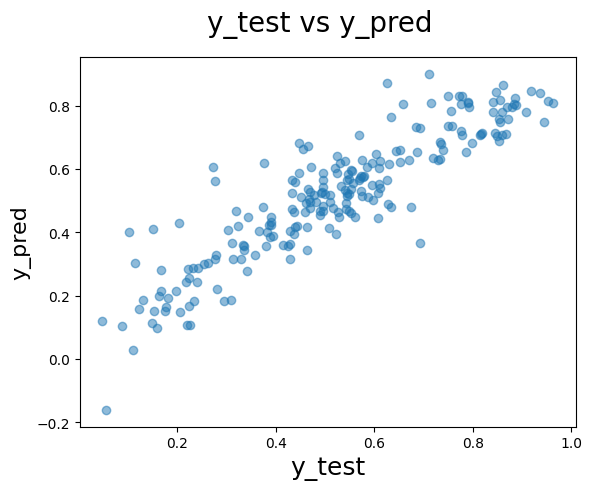

In [336]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### __R^2 Value for TEST__

In [337]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8045

##### __As R^2 = 0.8045,This indicates that 80.45% of the variance in the test data is explained by the model's predictions.__

### __Adjusted R^2 Value for TEST__

In [338]:
# We already have the value of R^2 (calculated in above step)
r2=0.8045
# Get the shape of X_test
X_test.shape

(219, 14)

In [339]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7910833333333334

In [340]:
round(lr2.params,4)

const                        0.1737
yr                           0.2344
holiday                     -0.0562
workingday                   0.0465
temp                         0.4728
windspeed                   -0.1563
season_spring               -0.0597
season_summer                0.0434
season_winter                0.0797
mnth_jan                    -0.0389
mnth_july                   -0.0482
mnth_sep                     0.0753
weekday_sat                  0.0584
weathersit_Light_snowrain   -0.2917
weathersit_Misty            -0.0826
dtype: float64

##### __The equation of best fitted surface based on model lr2:__
cnt = 0.1737 + (yr × 0.2344) - (holiday × 0.0562) + (workingday × 0.0465) + (temp × 0.4728) − (windspeed × 0.1563) - (season_spring  × 0.0597) + (season_summer × 0.0434) + (season_winter × 0.0797) - (mnth_jan × 0.0389) - (mnth_july × 0.0482) + (mnth_sep × 0.0753) + (weekday_sat  × 0.0584) − (weathersit_Light_snowrain × 0.2917) − (weathersit_Misty × 0.0826)

#### __Visualizing the fit on the test data__
#### plotting a Regression plot

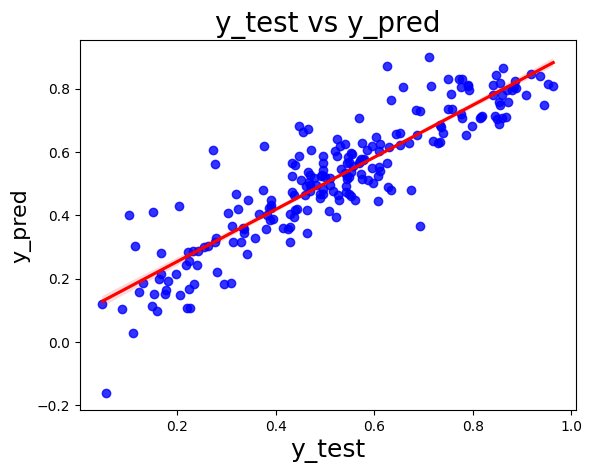

In [341]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

##### __Comparison between Training and Testing dataset:__
- Train dataset R^2          : 0.843
- Test dataset R^2           : 0.8045
- Train dataset Adjusted R^2 : 0.839    
- Test dataset Adjusted R^2  : 0.7910

#### __Summery and Recommendation__
##### __Factors which help to spur bike rental demand__
- Temparture
- Year
- Month of Sep
- Winter Season
- Summer Season
- Working Day
- Saturday 
##### __Factors which impact negatively the bike rental demand__
- Holiday
- Windspeed
- Spring Season
- Month of Jan and July
- When it rain or snow fall happens
- When misty condition is there